# Predicting Rank based on Marks

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [208]:
marks=pd.read_excel('CGPA and Average Grade Point details for Branch Allocation AY2020-21.xlsx')

In [209]:
marks.head()

,S.No,Roll Number,Number of remedials,CGPA (upto P2S2),Average GP of Maths in PUC,Average GP of Physics in PUC,Average GP of Chemistry in PUC,Eligible for Branch allocation ?,Rank
0,1,N170822,0,7.66,7.25,7.25,7.25,YES,Rank No : 719
1,2,N180059,0,6.55,6.25,6.00,6.00,YES,Rank No : 1084
2,3,N180154,0,8.35,8.25,8.00,7.75,YES,Rank No : 432
3,4,N180156,0,8.59,8.50,8.25,8.00,YES,Rank No : 335
4,5,N180300,0,7.95,8.00,7.50,7.75,YES,Rank No : 609


In [210]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   S.No                              1277 non-null   int64  
 1   Roll Number                       1277 non-null   object 
 2   Number of remedials               1277 non-null   int64  
 3   CGPA (upto P2S2)                  1277 non-null   float64
 4   Average GP of Maths in PUC        1277 non-null   float64
 5   Average GP of Physics in PUC      1277 non-null   float64
 6   Average GP of Chemistry in PUC    1277 non-null   float64
 7   Eligible for Branch allocation ?  1277 non-null   object 
 8   Rank                              441 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 89.9+ KB


In [211]:
marks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S.No,1277.0,639.000000,368.782456,1.0,320.00,639.00,958.00,1277.00
Number of remedials,1277.0,0.521535,2.172906,0.0,0.00,0.00,0.00,27.00
CGPA (upto P2S2),1277.0,7.704002,1.409733,0.0,7.05,7.89,8.63,9.95
Average GP of Maths in PUC,1277.0,7.590446,1.378440,0.0,6.75,7.75,8.50,10.00
Average GP of Physics in PUC,1277.0,7.601997,1.434066,0.0,7.00,7.75,8.50,10.00
Average GP of Chemistry in PUC,1277.0,7.651527,1.283464,0.0,7.00,7.75,8.50,10.00


In [212]:
marks['Rank']=marks.Rank.str[10:]


In [213]:
marks[['Rank']]=marks[['Rank']].apply(pd.to_numeric)

In [214]:
marks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S.No,1277.0,639.000000,368.782456,1.0,320.00,639.00,958.00,1277.00
Number of remedials,1277.0,0.521535,2.172906,0.0,0.00,0.00,0.00,27.00
CGPA (upto P2S2),1277.0,7.704002,1.409733,0.0,7.05,7.89,8.63,9.95
Average GP of Maths in PUC,1277.0,7.590446,1.378440,0.0,6.75,7.75,8.50,10.00
Average GP of Physics in PUC,1277.0,7.601997,1.434066,0.0,7.00,7.75,8.50,10.00
Average GP of Chemistry in PUC,1277.0,7.651527,1.283464,0.0,7.00,7.75,8.50,10.00
Rank,441.0,768.993197,241.319747,34.0,616.00,821.00,965.00,1104.00


In [215]:
marks=marks.dropna()

In [216]:
marks

,S.No,Roll Number,Number of remedials,CGPA (upto P2S2),Average GP of Maths in PUC,Average GP of Physics in PUC,Average GP of Chemistry in PUC,Eligible for Branch allocation ?,Rank
0,1,N170822,0,7.66,7.25,7.25,7.25,YES,719.0
1,2,N180059,0,6.55,6.25,6.00,6.00,YES,1084.0
2,3,N180154,0,8.35,8.25,8.00,7.75,YES,432.0
3,4,N180156,0,8.59,8.50,8.25,8.00,YES,335.0
4,5,N180300,0,7.95,8.00,7.50,7.75,YES,609.0
...,...,...,...,...,...,...,...,...,...
999,1000,R180830,0,6.53,6.25,6.25,6.75,YES,1088.0
1002,1003,R180833,0,6.66,6.25,6.75,6.50,YES,1064.0
1014,1015,R180845,0,6.79,6.50,7.00,6.75,YES,1027.0
1043,1044,R180874,0,6.68,6.75,6.50,6.75,YES,1057.0


In [217]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   S.No                              441 non-null    int64  
 1   Roll Number                       441 non-null    object 
 2   Number of remedials               441 non-null    int64  
 3   CGPA (upto P2S2)                  441 non-null    float64
 4   Average GP of Maths in PUC        441 non-null    float64
 5   Average GP of Physics in PUC      441 non-null    float64
 6   Average GP of Chemistry in PUC    441 non-null    float64
 7   Eligible for Branch allocation ?  441 non-null    object 
 8   Rank                              441 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 34.5+ KB


In [218]:
x=marks[['Average GP of Physics in PUC', 'Average GP of Maths in PUC', 'Average GP of Chemistry in PUC']]
y=marks[['Rank']]

In [219]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=0)

In [220]:
lr=LinearRegression()

In [221]:
x_train, y_train, x_test, y_test

(     Average GP of Physics in PUC  Average GP of Maths in PUC  \
 98                           6.50                       6.375   
 28                           6.50                       6.500   
 51                           8.50                       7.750   
 648                          7.75                       7.500   
 245                          8.00                       7.750   
 ..                            ...                         ...   
 528                          7.25                       8.000   
 296                          8.25                       8.250   
 189                          7.75                       7.750   
 53                           6.25                       6.500   
 272                          7.25                       7.250   
 
      Average GP of Chemistry in PUC  
 98                             7.00  
 28                             6.00  
 51                             8.50  
 648                            7.25  
 245       

In [222]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 1070
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   S.No                              441 non-null    int64  
 1   Roll Number                       441 non-null    object 
 2   Number of remedials               441 non-null    int64  
 3   CGPA (upto P2S2)                  441 non-null    float64
 4   Average GP of Maths in PUC        441 non-null    float64
 5   Average GP of Physics in PUC      441 non-null    float64
 6   Average GP of Chemistry in PUC    441 non-null    float64
 7   Eligible for Branch allocation ?  441 non-null    object 
 8   Rank                              441 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 34.5+ KB


In [223]:
lr.fit(x_train, y_train)

LinearRegression()

In [225]:
y_pred=lr.predict(x_test)

In [228]:
y_test.head(), y_pred[:5]

(       Rank
 625  1011.0
 391   870.0
 432   548.0
 964  1004.0
 724   970.0,
 array([[1027.61866668],
        [ 843.37326399],
        [ 597.65117429],
        [1093.0195139 ],
        [ 903.10979546]]))

In [187]:
y_test['Rank'][625]

1011.0

In [229]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rank')

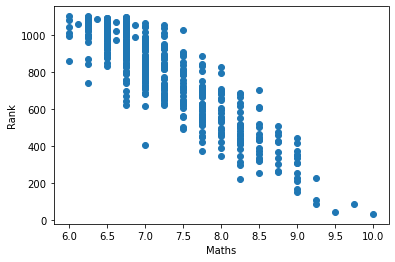

In [235]:
plt.scatter(marks['Average GP of Maths in PUC'], y)
plt.xlabel('Maths')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

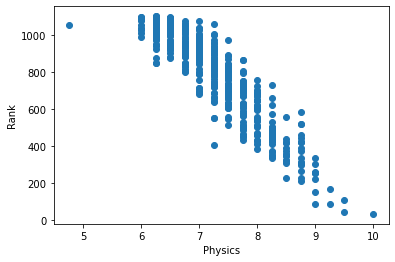

In [236]:
plt.scatter(marks['Average GP of Physics in PUC'], y)
plt.xlabel('Physics')
plt.ylabel('Rank')

Text(0, 0.5, 'Rank')

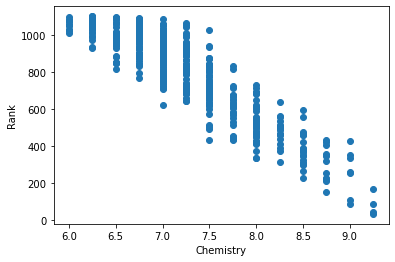

In [237]:
plt.scatter(marks['Average GP of Chemistry in PUC'], y)
plt.xlabel('Chemistry')
plt.ylabel('Rank')